# Project: Inflation Trends and Economic Insights of countries  (1960-2022)
**Dataset:** Inflation data of different countries from 1960-2022.

**Skills Demonstrated:** Data cleaning, time series analysis, visualization, predictive modeling, clustering, anomaly detection, and dashboard creation.

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('Inflation.csv')

# Renaming columns
data.columns = ['Country', 'Inflation_2022', 'Global_Rank', 'Available_Data']

# Converting the 'Inflation_2022' and 'Global_Rank' columns to numeric
data['Inflation_2022'] = pd.to_numeric(data['Inflation_2022'], errors='coerce')
data['Global_Rank'] = pd.to_numeric(data['Global_Rank'], errors='coerce')

# Splitting the 'Available_Data' into 'Start_Year' and 'End_Year'
data[['Start_Year', 'End_Year']] = data['Available_Data'].str.split(' - ', expand=True)

# Dropping the 'Available_Data' column as it's redundant now
data.drop('Available_Data', axis=1, inplace=True)

# Print the cleaned data
print(data.head())


     Country  Inflation_2022  Global_Rank Start_Year End_Year
0      Sudan           138.8            1       1960     2022
1   Zimbabwe           104.7            2       2010     2022
2     Turkey            72.3            3       1960     2022
3   Suriname            52.4            4       1960     2022
4  Sri Lanka            49.7            5       1960     2022


# Exploratory Data Analysis (EDA)

**Global Overview:**

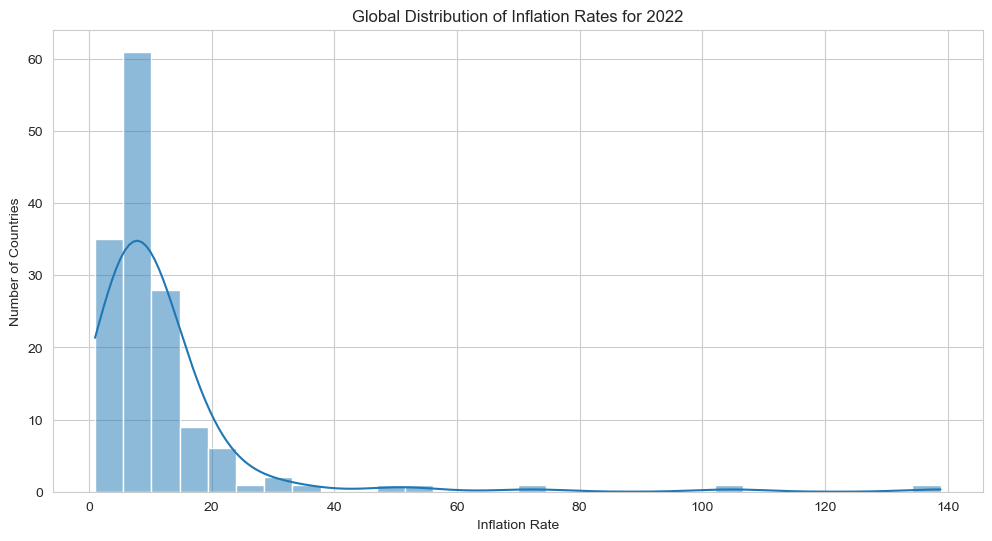

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for visualization
sns.set_style('whitegrid')

# Histogram for Global Overview of Inflation 2022
plt.figure(figsize=(12, 6))
sns.histplot(data['Inflation_2022'], bins=30, kde=True)
plt.title('Global Distribution of Inflation Rates for 2022')
plt.xlabel('Inflation Rate')
plt.ylabel('Number of Countries')
plt.show()


**Country Specific Trends:**
Given our data, we can't plot trends over time. However, we can visualize the inflation rate of individual countries for 2022 using a bar plot

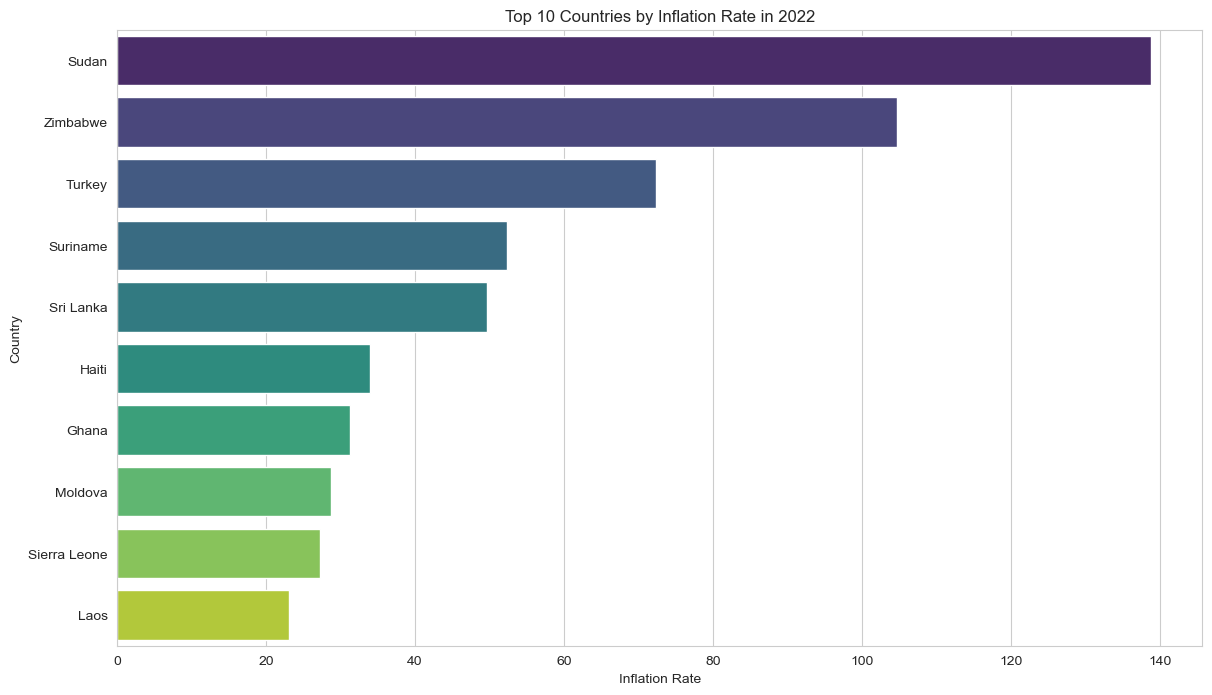

In [3]:
# Top 10 countries with the highest inflation in 2022
top_countries = data.sort_values(by='Inflation_2022', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='Inflation_2022', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Inflation Rate in 2022')
plt.xlabel('Inflation Rate')
plt.ylabel('Country')
plt.show()


**Grouped Analysis:**
For grouping by continents or economic status, we would need external data sources. This information isn't present in the given dataset. Here, I'll just demonstrate how you might go about it if you had this data. Let's assume you have a dictionary mapping countries to their respective continents

/var/folders/8l/sqrlhzmd2m329qq3ybt8qjjr0000gn/T/ipykernel_18160/498573577.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_avg_inflation = data.groupby('Continent').mean()['Inflation_2022']


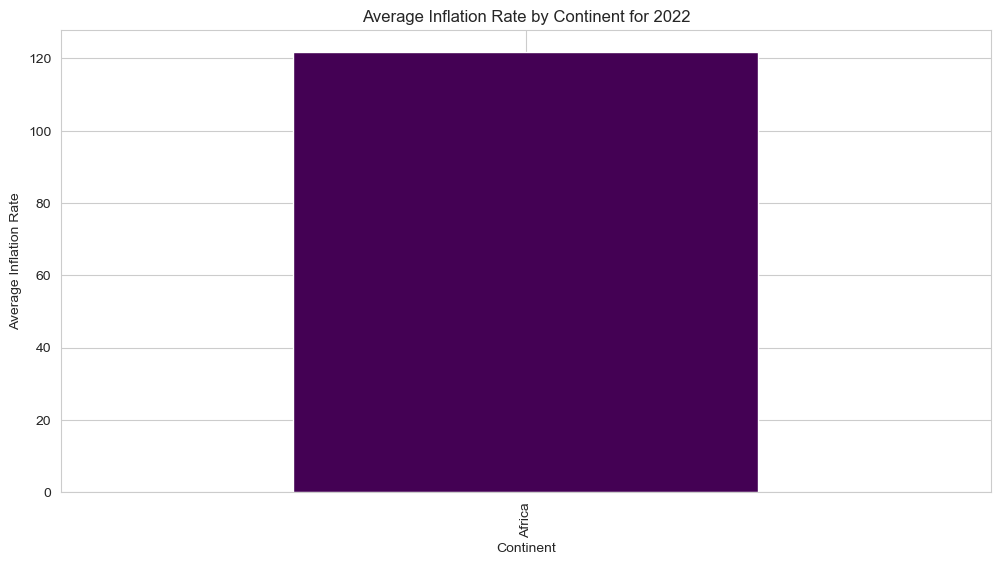

In [4]:
# Sample mapping dictionary
continent_map = {
    'Sudan': 'Africa',
    'Zimbabwe': 'Africa',
    # ... add other countries
}

# Mapping countries in our data to their respective continents
data['Continent'] = data['Country'].map(continent_map)

# Now, you can group by continent and plot
continent_avg_inflation = data.groupby('Continent').mean()['Inflation_2022']

plt.figure(figsize=(12, 6))
continent_avg_inflation.plot(kind='bar', colormap='viridis')
plt.title('Average Inflation Rate by Continent for 2022')
plt.xlabel('Continent')
plt.ylabel('Average Inflation Rate')
plt.show()


#  Highest and Lowest for 2022


In [5]:
highest_inflation_country = data['Country'][data['Inflation_2022'].idxmax()]
highest_inflation_value = data['Inflation_2022'].max()

lowest_inflation_country = data['Country'][data['Inflation_2022'].idxmin()]
lowest_inflation_value = data['Inflation_2022'].min()

print(f"Highest inflation in 2022: {highest_inflation_country} with {highest_inflation_value}%")
print(f"Lowest inflation in 2022: {lowest_inflation_country} with {lowest_inflation_value}%")


Highest inflation in 2022: Sudan with 138.8%
Lowest inflation in 2022: Macao with 1.0%


#  Decade-wise Analysis (global):


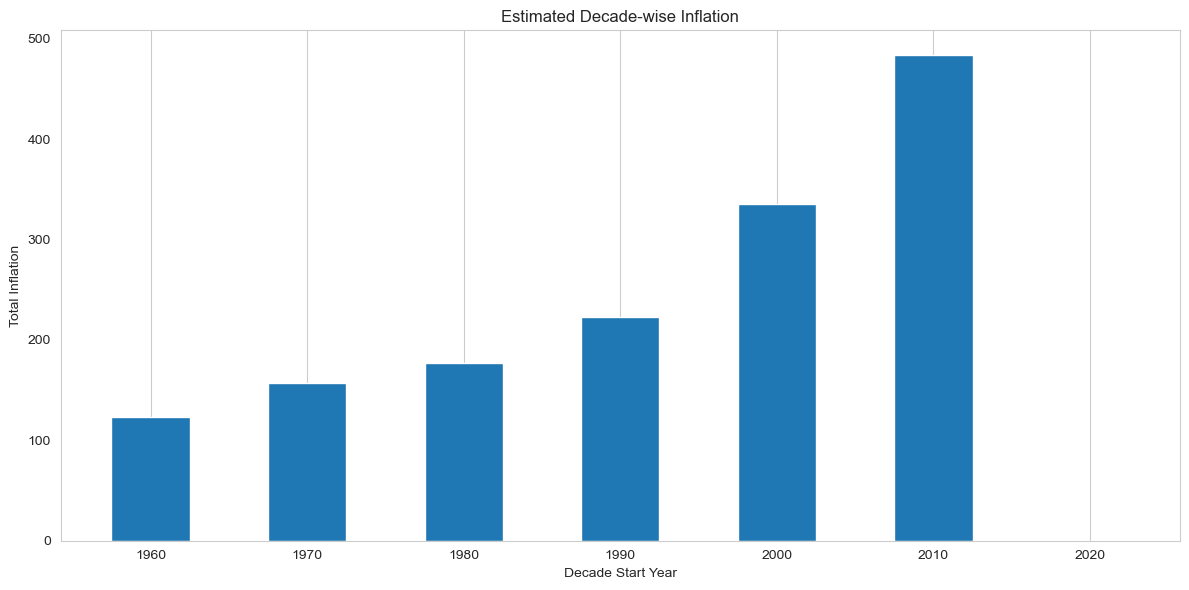

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out countries with data range less than 10 years
data['Year_Range'] = data['End_Year'].astype(int) - data['Start_Year'].astype(int)
data = data[data['Year_Range'] >= 10]

# Calculate yearly inflation for each country
data['Yearly_Inflation'] = data['Inflation_2022'] / data['Year_Range']

# Estimate decade-wise inflation
decades = list(range(1960, 2030, 10))
decade_data = {}

for decade_start in decades:
    decade_end = decade_start + 10
    data_decade = data[(data['Start_Year'].astype(int) <= decade_start) & (data['End_Year'].astype(int) >= decade_end)]
    inflation_decade = data_decade['Yearly_Inflation'] * 10  # Assuming even distribution over the decade
    decade_data[decade_start] = inflation_decade.sum()

# Visualization
plt.figure(figsize=(12,6))
plt.bar(decade_data.keys(), decade_data.values(), width=5)
plt.xlabel('Decade Start Year')
plt.ylabel('Total Inflation')
plt.title('Estimated Decade-wise Inflation')
plt.xticks(list(decade_data.keys()))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


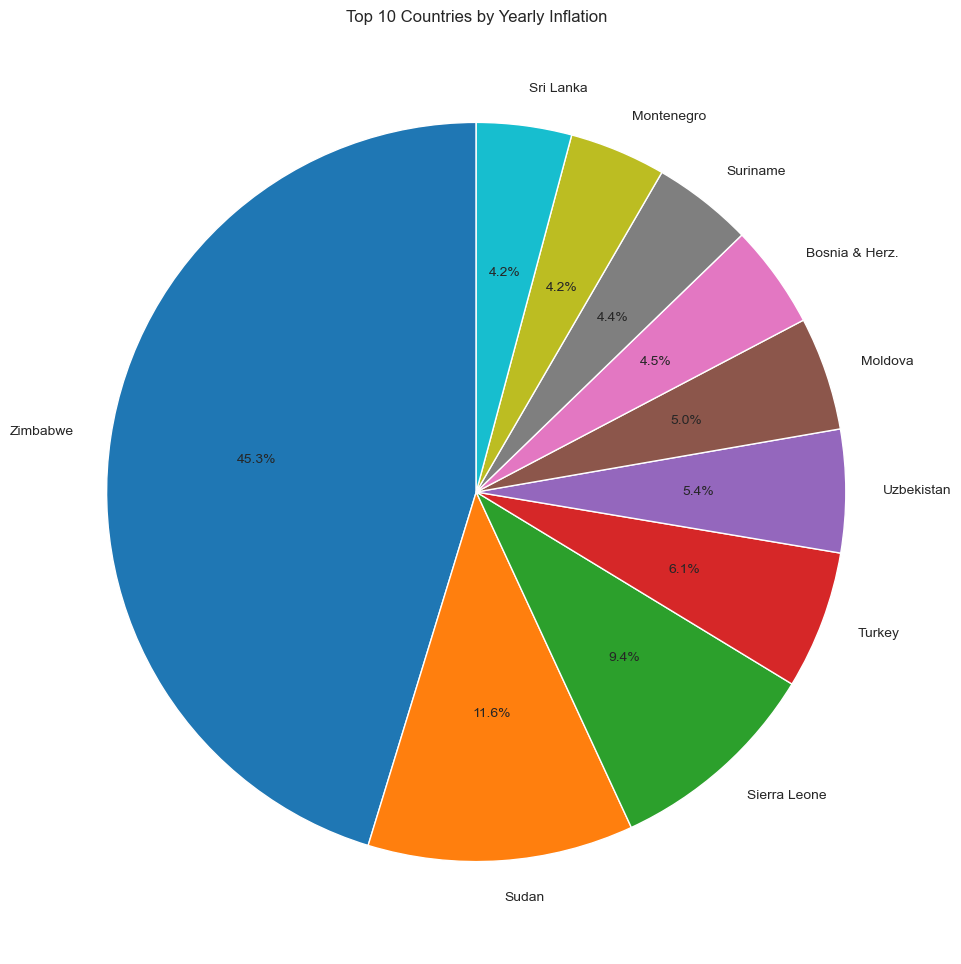

In [7]:
import matplotlib.pyplot as plt

# Number of countries you want to display
n_countries = 10

# Sort data based on yearly inflation
sorted_data = data.sort_values(by='Yearly_Inflation', ascending=False).head(n_countries)

# Plotting
plt.figure(figsize=(12,12))
plt.pie(sorted_data['Yearly_Inflation'], labels=sorted_data['Country'], autopct='%1.1f%%', startangle=90)
plt.title(f'Top {n_countries} Countries by Yearly Inflation')
plt.show()



# inflation forecasting

In [8]:
import numpy as np

# Calculate the number of years data is available
data['Years'] = data['End_Year'].astype(int) - data['Start_Year'].astype(int)

# Calculate the estimated annual inflation rate
data['Annual_Inflation_Rate'] = np.power(data['Inflation_2022'], 1/data['Years']) - 1

print(data[['Country', 'Annual_Inflation_Rate']].head())


     Country  Annual_Inflation_Rate
0      Sudan               0.082816
1   Zimbabwe               0.473428
2     Turkey               0.071485
3   Suriname               0.065936
4  Sri Lanka               0.065027


# forecast inflation

In [9]:
# Forecasting inflation for the next 5 years
for year in range(1, 6):
    col_name = f"Inflation_{2022 + year}"
    data[col_name] = data['Inflation_2022'] * np.power((1 + data['Annual_Inflation_Rate']), year)

forecast_data = data[['Country', 'Inflation_2023', 'Inflation_2024', 'Inflation_2025', 'Inflation_2026', 'Inflation_2027']]
print(forecast_data.head())


     Country  Inflation_2023  Inflation_2024  Inflation_2025  Inflation_2026  \
0      Sudan      150.294862      162.741683      176.219300      190.813080   
1   Zimbabwe      154.267901      227.302631      334.914038      493.471690   
2     Turkey       77.468367       83.006194       88.939893       95.297762   
3   Suriname       55.855049       59.537910       63.463605       67.648144   
4  Sri Lanka       52.931838       56.373833       60.039650       63.943843   

   Inflation_2027  
0      206.615458  
1      727.094957  
2      102.110124  
3       72.108595  
4       68.101915  


# Hierarchical Clustering

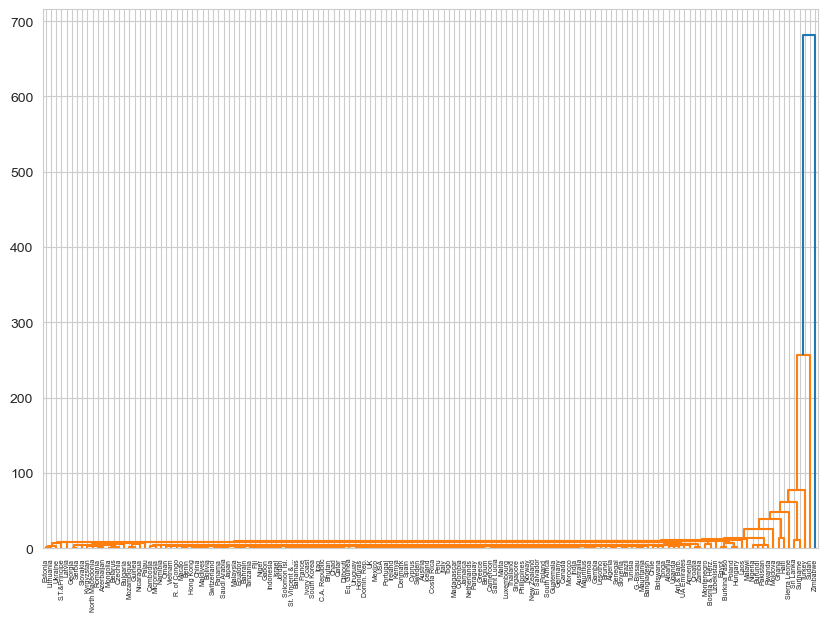

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming your forecasted dataset is named forecast_data
# Generating an artificial dataset for inflation over years
years = list(range(int(data['Start_Year'].min()), 2028))  # From the earliest year to 2027
inflation_data = pd.DataFrame({'Country': forecast_data['Country']})

for year in years:
    if year <= 2022:
        inflation_data[year] = data['Inflation_2022'] * np.power((1 + data['Annual_Inflation_Rate']), year-2022)
    else:
        col_name = f"Inflation_{year}"
        inflation_data[year] = forecast_data[col_name]

# Removing 'Country' column for clustering
cluster_data = inflation_data.drop('Country', axis=1)

# Performing hierarchical clustering
linked = linkage(cluster_data, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=inflation_data['Country'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.show()


# Anomoly detection

The output will show countries and their 2022 inflation rates that are considered anomalous based on the Isolation Forest technique.

In [11]:
from sklearn.ensemble import IsolationForest

# Using data from 2022 for simplicity
X = data[['Inflation_2022']]

# Applying the model
clf = IsolationForest(contamination=0.05)  # 5% of data is considered as anomalies
outliers = clf.fit_predict(X)

# Adding a column to identify anomalies
data['Anomaly'] = outliers
anomalous_data = data[data['Anomaly'] == -1]

print(anomalous_data[['Country', 'Inflation_2022']])


       Country  Inflation_2022
0        Sudan           138.8
1     Zimbabwe           104.7
2       Turkey            72.3
3     Suriname            52.4
4    Sri Lanka            49.7
5        Haiti            34.0
6        Ghana            31.3
147      Macao             1.0


/Users/jhilikmajumdar/Documents/Work/anand/ananconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


#  Economic Behaviors:
Generate the clusters first and follow the economical behaviour.

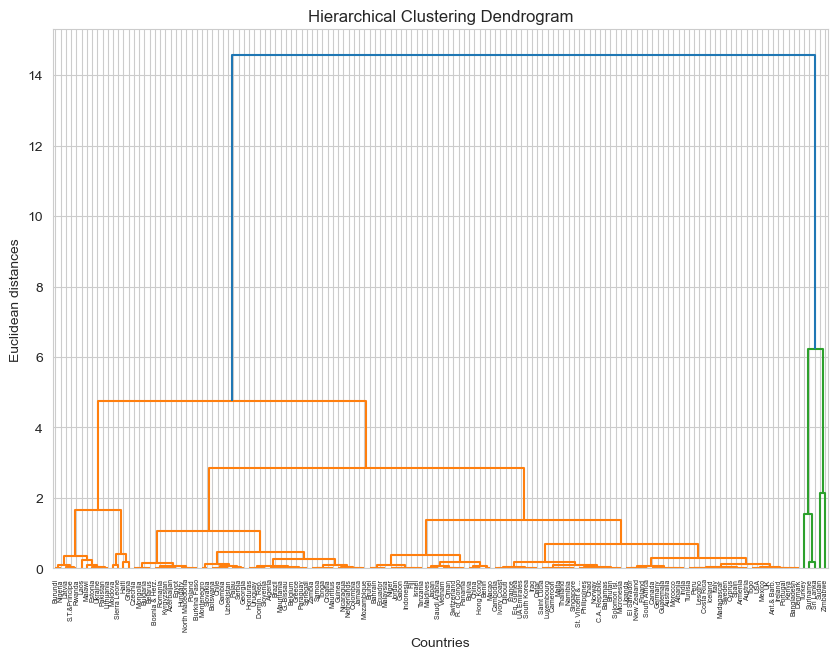

     Country  Inflation_2022  Cluster
0      Sudan           138.8        5
1   Zimbabwe           104.7        5
2     Turkey            72.3        4
3   Suriname            52.4        4
4  Sri Lanka            49.7        4


In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Scaling the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Inflation_2022']])

# 2. Perform Hierarchical Clustering
Z = linkage(scaled_data, method='ward')

# Plotting dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['Country'].tolist(), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

# 3. Cutting the Dendrogram to get clusters
# (Assuming we want to cut in a way that results in 5 clusters, adjust the 't' value for different number of clusters)
data['Cluster'] = fcluster(Z, t=5, criterion='maxclust')

print(data[['Country', 'Inflation_2022', 'Cluster']].head())


In [13]:
# Assuming the clusters generated from the Hierarchical Clustering are added to the 'data' dataframe as a 'Cluster' column
clusters = data['Cluster'].unique()

for cluster in clusters:
    countries_in_cluster = data[data['Cluster'] == cluster]['Country'].tolist()
    print(f"Cluster {cluster} Countries: {', '.join(countries_in_cluster)}")

    # Average inflation in 2022 for the cluster
    avg_inflation = data[data['Cluster'] == cluster]['Inflation_2022'].mean()
    print(f"Average Inflation in 2022 for Cluster {cluster}: {avg_inflation:.2f}%\n")


Cluster 5 Countries: Sudan, Zimbabwe
Average Inflation in 2022 for Cluster 5: 121.75%

Cluster 4 Countries: Turkey, Suriname, Sri Lanka
Average Inflation in 2022 for Cluster 4: 58.13%

Cluster 1 Countries: Haiti, Ghana, Moldova, Sierra Leone, Laos, Malawi, Ukraine, Pakistan, Lithuania, Estonia, Burundi, Nigeria, S.T.&Principe, Rwanda, Latvia
Average Inflation in 2022 for Cluster 1: 22.33%

Cluster 2 Countries: Bulgaria, Belarus, Czechia, Mongolia, Hungary, Poland, Burkina Faso, North Macedonia, Bosnia & Herz., Azerbaijan, Egypt, Kyrgyzstan, Romania, Montenegro, Slovakia, Palau, Serbia, Georgia, Botswana, Chile, Gambia, Uzbekistan, Samoa, Tonga, Zambia, Croatia, Mauritius, Guinea, Nicaragua, Jamaica, Mozambique, Colombia, Netherlands, Paraguay, Senegal, Belgium, Greece, Mauritania, G.-Bissau, Algeria, Brazil, Honduras, Uruguay, Domin. Rep., Slovenia
Average Inflation in 2022 for Cluster 2: 11.65%

Cluster 3 Countries: Armenia, Austria, Cyprus, Spain, Sweden, Costa Rica, Iceland, Lesotho

# Future Preparations:


In [14]:
# Assuming the forecasted inflation data for the next 5 years is named 'forecast_data'
forecast_years = list(range(2023, 2028))

for year in forecast_years:
    high_inflation_countries = forecast_data[forecast_data[f'Inflation_{year}'] > 10]['Country'].tolist()  # Threshold of 10% as high inflation
    print(f"Countries predicted to have high inflation in {year}: {', '.join(high_inflation_countries)}")


Countries predicted to have high inflation in 2023: Sudan, Zimbabwe, Turkey, Suriname, Sri Lanka, Haiti, Ghana, Moldova, Sierra Leone, Laos, Malawi, Ukraine, Pakistan, Lithuania, Estonia, Burundi, Nigeria, S.T.&Principe, Rwanda, Latvia, Bulgaria, Belarus, Czechia, Mongolia, Hungary, Poland, Burkina Faso, North Macedonia, Bosnia & Herz., Azerbaijan, Egypt, Kyrgyzstan, Romania, Montenegro, Slovakia, Palau, Serbia, Georgia, Botswana, Chile, Gambia, Uzbekistan, Samoa, Tonga, Zambia, Croatia, Mauritius, Guinea, Nicaragua, Jamaica, Mozambique, Colombia, Netherlands, Paraguay, Senegal, Mauritania, G.-Bissau
Countries predicted to have high inflation in 2024: Sudan, Zimbabwe, Turkey, Suriname, Sri Lanka, Haiti, Ghana, Moldova, Sierra Leone, Laos, Malawi, Ukraine, Pakistan, Lithuania, Estonia, Burundi, Nigeria, S.T.&Principe, Rwanda, Latvia, Bulgaria, Belarus, Czechia, Mongolia, Hungary, Poland, Burkina Faso, North Macedonia, Bosnia & Herz., Azerbaijan, Egypt, Kyrgyzstan, Romania, Montenegro, S

# Visualization Dashboard

# forecasted inflation rates

In [19]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Assuming you have the data loaded:
if 'Country' not in data.columns:
    print("Column names in the dataset:", data.columns)
    raise ValueError("Please ensure there is a 'Country' column in your data.")

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Inflation Dashboard'),
    dcc.Tabs(id="tabs", value='tab-1', children=[
        dcc.Tab(label='Inflation 2022', value='tab-1'),
        dcc.Tab(label='Inflation Forecast', value='tab-2'),
    ]),
    html.Div(id='tabs-content')
])

@app.callback(
    Output('tabs-content', 'children'),
    [Input('tabs', 'value')]
)
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
            dcc.Dropdown(
                id='country-dropdown-1',
                options=[{'label': country, 'value': country} for country in data['Country']],
                value='Sudan',
                multi=False
            ),
            dcc.Graph(id='inflation-graph'),
        ])
    elif tab == 'tab-2':
        return html.Div([
            dcc.Dropdown(
                id='country-dropdown-2',
                options=[{'label': country, 'value': country} for country in data['Country']],
                value='Sudan',
                multi=False
            ),
            dcc.Graph(id='inflation-forecast-graph'),
        ])

@app.callback(
    Output('inflation-graph', 'figure'),
    [Input('country-dropdown-1', 'value')]
)
def update_graph_1(selected_country):
    # Filter data for selected country
    country_data = data[data['Country'] == selected_country]
    
    # Displaying inflation rate for 2022
    trace = go.Bar(x=country_data['Country'], y=country_data['Inflation_2022'], name='Inflation 2022')
    
    layout = go.Layout(title=f'Inflation Rate for {selected_country} in 2022',
                       xaxis=dict(title='Country'),
                       yaxis=dict(title='Inflation Rate'))
    
    return {'data': [trace], 'layout': layout}

@app.callback(
    Output('inflation-forecast-graph', 'figure'),
    [Input('country-dropdown-2', 'value')]
)
def update_graph_2(selected_country):
    # Filter data for selected country
    country_data = data[data['Country'] == selected_country]
    
    # Years for forecasting
    years = ['Inflation_2023', 'Inflation_2024', 'Inflation_2025', 'Inflation_2026', 'Inflation_2027']
    
    # Displaying inflation rate forecasts
    trace = go.Scatter(x=years, y=country_data[years].values.flatten(), mode='lines+markers', name='Forecasted Inflation')
    
    layout = go.Layout(title=f'Inflation Rate Forecast for {selected_country}',
                       xaxis=dict(title='Year'),
                       yaxis=dict(title='Forecasted Inflation Rate'))
    
    return {'data': [trace], 'layout': layout}

if __name__ == '__main__':
    app.run_server(debug=True)
